# Credit Card Fraud Detection using ML Techniques

# Introduction

The objective in this project is to build machine learning models to identify fraudulent card transactions from a given card transactions data.

Link for the dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
data = pd.read_csv('E:/Python/creditcard.csv')

In [4]:
# View top 5 records
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# The number of records in data
print("The dataset contains {} rows and {} columsns".format(data.shape[0],data.shape[1]))

The dataset contains 284807 rows and 31 columsns


In [6]:
# Check for missing values and type of data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

C:\Users\Vishwaraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


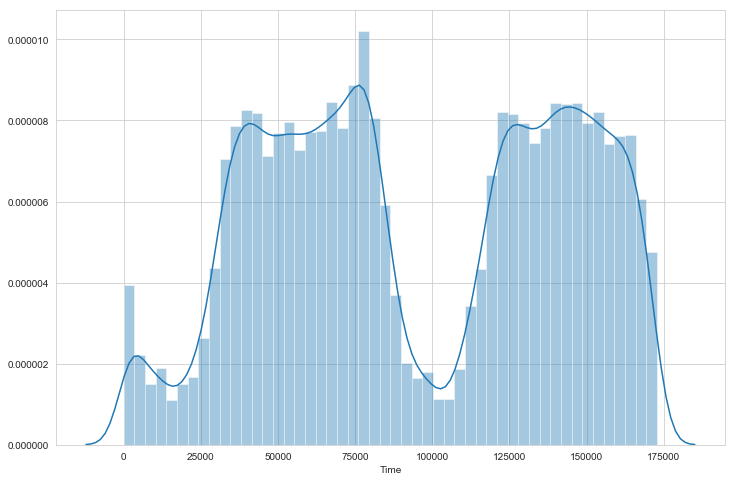

In [7]:
# Distribution of time column. It is bimodal suggesting the drop might be at night

plt.subplots(figsize = (12,8))
sns.distplot(data['Time'])

C:\Users\Vishwaraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


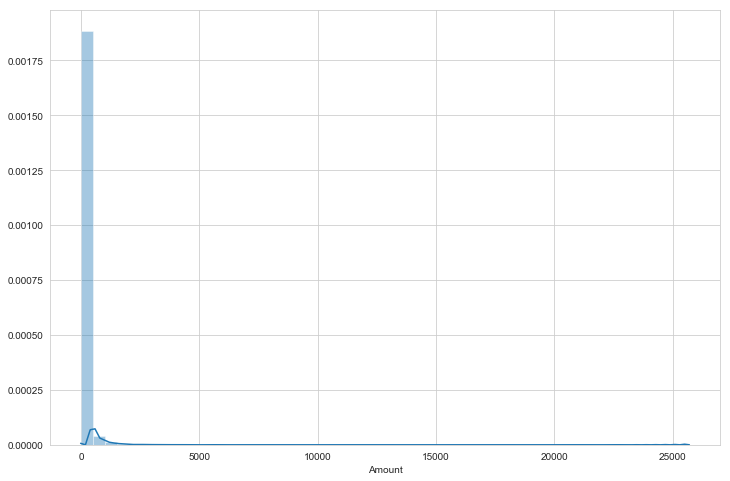

In [8]:
# Distribution of Transaction Amount showing that the vast majority of transactions are relatively small

plt.subplots(figsize = (12,8))
sns.distplot(data['Amount'])

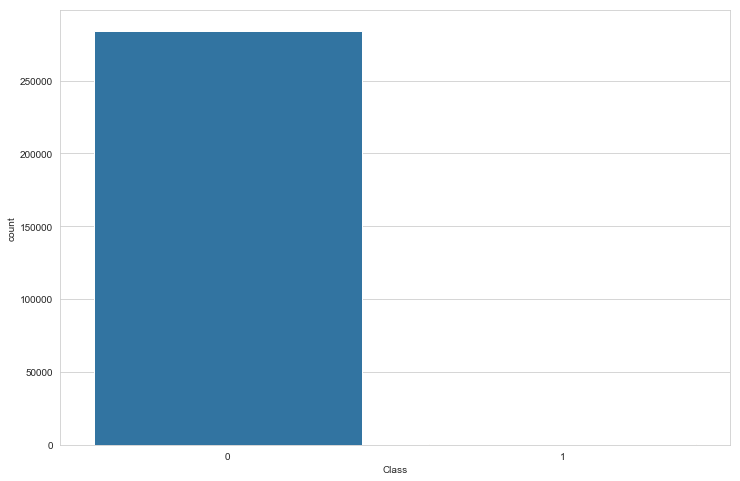

In [9]:
# Distribution of Classes. It shows that the number of normal transactions are relatively very high as compared to fradulent ones

plt.subplots(figsize = (12,8))
sns.countplot(data['Class'])

In [10]:
print("Number of normal transactions:",data['Class'].value_counts()[0])
print("Number of fradulent transactions:",data['Class'].value_counts()[1])

Number of normal transactions: 284315
Number of fradulent transactions: 492


Seperating data for model creation

In [11]:
x = data.iloc[:,:-1]

In [12]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [13]:
y = data['Class']

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Standardize data to scale it to 0 mean and unit variance

In [15]:
scaled_x = StandardScaler().fit_transform(x)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=101)

# Sampling

Now, as we studied earlier, our target class was imbalanced. So, we will be using Sampling techniques to generate new lower class data points

In [17]:
from imblearn.over_sampling import ADASYN

In [18]:
adp = ADASYN(random_state=42)

In [19]:
X_adp,y_adp = adp.fit_sample(X_train, y_train )

In [20]:
print("Original data shape:", y_train.shape)
print("Resampled data shape:", y_adp.shape)

Original data shape: (227845,)
Resampled data shape: (454934,)


In [21]:
X_train, y_train = X_adp, y_adp 

In [22]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_auc_score, roc_curve, auc

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
predict_lg = lg.predict(X_test)

C:\Users\Vishwaraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
print(accuracy_score(y_test, predict_lg))

0.9174186299638355


In [26]:
print(classification_report(y_test, predict_lg))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56859
           1       0.02      0.92      0.04       103

   micro avg       0.92      0.92      0.92     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.92      0.96     56962



In [27]:
print(confusion_matrix(y_test, predict_lg))

[[52163  4696]
 [    8    95]]


We can see from low precision, the model is misclassifying many labels but also doing decent at the same time.

ROC Curve for Logistic Regression

In [28]:
fpr , tpr, threshold = roc_curve(y_test, predict_lg)
roc_auc = auc(fpr,tpr)
print(roc_auc)

0.9198699149676504


Text(0.5,0,'False Positive Rate')

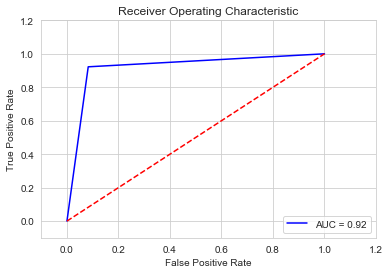

In [29]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Feature Selection

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
fe = ExtraTreesClassifier()
fe.fit(x,y)

C:\Users\Vishwaraj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
print(fe.feature_importances_)

[0.01562055 0.01331799 0.02076251 0.03170914 0.02669762 0.01969229
 0.01485629 0.02083065 0.01108425 0.03355876 0.05064261 0.08142532
 0.08958573 0.0100015  0.11158706 0.01438485 0.05088948 0.16404059
 0.08024878 0.01605641 0.01192524 0.02017697 0.01327423 0.00625217
 0.01242168 0.00936095 0.01726209 0.01202603 0.00989927 0.010409  ]


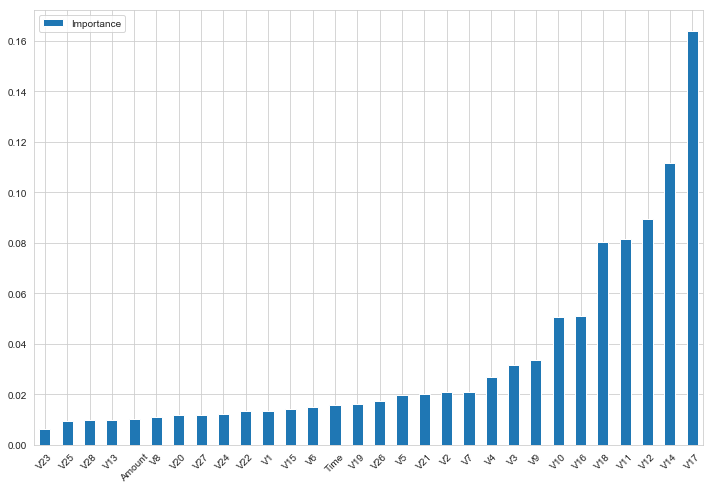

In [32]:
feats = {} 
for feature, importance in zip(data.columns, fe.feature_importances_):
    feats[feature] = importance 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance').plot(kind='bar', rot=45, figsize=(12,8))

Above fig shows important features

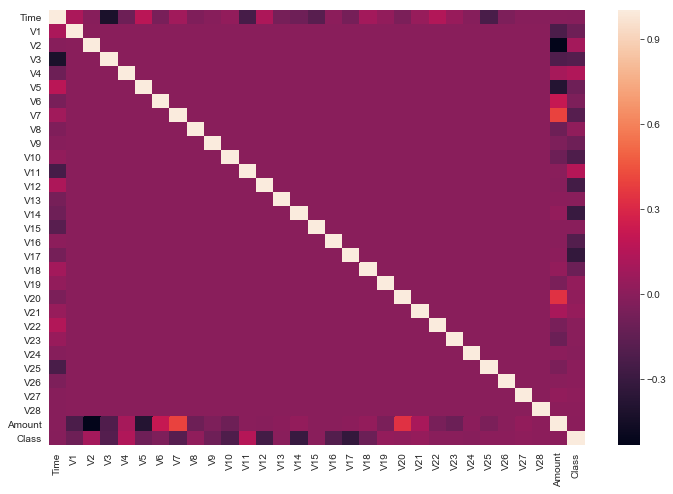

In [33]:
# The following is the correlation heatmap of the data
# The class variable is out target variable and hence we will look for correlation of 
# other variables with class
# The dark boxes in class variable show low variation with the corressponding variables  

cor = data.corr()
plt.subplots(figsize = (12,8))
sns.heatmap(cor)

In [34]:
imp_x = data[['V6','V4','V9','V18','V16','V11','V10','V12','V17','V14','V2','V3','V7']]

In [35]:
scaled_imp_x = StandardScaler().fit_transform(imp_x)

In [36]:
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(scaled_imp_x, y, test_size=0.2, random_state=101)

In [37]:
X_adp,y_adp = adp.fit_sample(X_imp_train, y_imp_train )

In [38]:
X_imp_train, y_imp_train = X_adp,y_adp

In [39]:
lg.fit(X_imp_train, y_imp_train)
predict_lg_new = lg.predict(X_imp_test)

C:\Users\Vishwaraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
print(classification_report(y_imp_test, predict_lg_new))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     56859
           1       0.01      0.93      0.03       103

   micro avg       0.89      0.89      0.89     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.89      0.94     56962



In [41]:
print(confusion_matrix(y_imp_test, predict_lg_new))

[[50543  6316]
 [    7    96]]


Still the model is doing poor. Don't think feature selection is helping. So lets try another one

# Random Forest 

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
predictRF2 = rf.predict(X_test)

C:\Users\Vishwaraj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
print(confusion_matrix(y_test, predictRF2))

[[56849    10]
 [   17    86]]


In [45]:
print(classification_report(y_test,predictRF2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.90      0.83      0.86       103

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [46]:
fpr , tpr, threshold = roc_curve(y_test, predictRF2)
roc_auc = auc(fpr,tpr)
print(roc_auc)

0.9173877913291557


Text(0.5,0,'False Positive Rate')

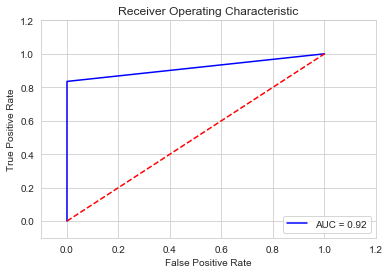

In [47]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Naive Bayes Bernoulli

In [48]:
from sklearn.naive_bayes import BernoulliNB 

In [49]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [50]:
print(confusion_matrix(y_test, nb_pred))

[[50805  6054]
 [    8    95]]


In [51]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     56859
           1       0.02      0.92      0.03       103

   micro avg       0.89      0.89      0.89     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.89      0.94     56962



In [52]:
fpr , tpr, threshold = roc_curve(y_test, nb_pred)
roc_auc = auc(fpr,tpr)
print(roc_auc)

0.9079280939718538


Text(0.5,0,'False Positive Rate')

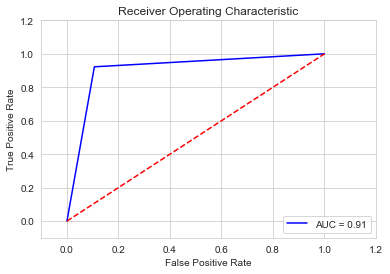

In [53]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')